## Métodos Numéricos para Resolver EDOs

---

Este notebook compara tres métodos numéricos para resolver ecuaciones diferenciales ordinarias (EDOs):
1. **Método de Euler** (Orden 1)
2. **Método de Heun** (Runge-Kutta de Orden 2)
3. **Método del Punto Medio** (RK2 alternativo)

Utilizaremos la EDO:
$$
\frac{dy}{dx} = y \cos(x), \quad y(0) = 1
$$
cuya solución exacta es $y(x) = e^{\sin(x)}$.

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la EDO: dy/dx = y * cos(x)
def f(x, y):
    return y * np.cos(x)

# Solución exacta: y(x) = e^(sin(x))
def exact_solution(x):
    return np.exp(np.sin(x))

### 📉 Método de Euler

$$
y_{i+1} = y_i + h \cdot f(x_i, y_i)
$$

In [19]:
def euler(f, x0, y0, h, steps):
    x = np.zeros(steps + 1)
    y = np.zeros(steps + 1)
    x[0], y[0] = x0, y0
    
    for i in range(steps):
        y[i+1] = y[i] + h * f(x[i], y[i])
        x[i+1] = x[i] + h
    
    return x, y

### 📉 Método de Heun

$$
y_{i+1} = y_i + \frac{h}{2} \cdot \left( f(x_i, y_i) + f(x_{i+1}, y^{0}_{i+1}) \right)
$$


In [20]:
def heun(f, x0, y0, h, steps):
    x = np.zeros(steps + 1)
    y = np.zeros(steps + 1)
    x[0], y[0] = x0, y0
    
    for i in range(steps):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h * k1)
        y[i+1] = y[i] + (h / 2) * (k1 + k2)
        x[i+1] = x[i] + h
    
    return x, y

### 📉 Método del Punto Medio

$$
y_{i+1} = y_i + h \cdot f(x_{i+\frac{1}{2}}, y_{i+\frac{1}{2}})
$$


In [21]:
def punto_medio(f, x0, y0, h, steps):
    x = np.zeros(steps + 1)
    y = np.zeros(steps + 1)
    x[0], y[0] = x0, y0
    
    for i in range(steps):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + (h/2) * k1)
        y[i+1] = y[i] + h * k2
        x[i+1] = x[i] + h
    
    return x, y

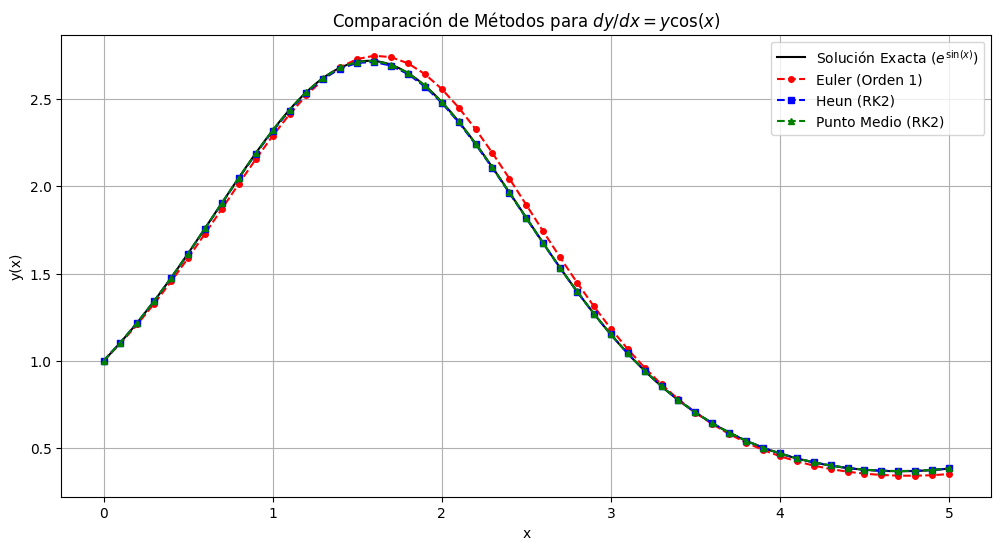

In [22]:
# Parámetros
x0, y0 = 0, 1 
h = 0.1         
steps = 50       

# Soluciones numéricas
x_euler, y_euler = euler(f, x0, y0, h, steps)
x_heun, y_heun = heun(f, x0, y0, h, steps)
x_pm, y_pm = punto_medio(f, x0, y0, h, steps)

# Solución exacta
x_exact = np.linspace(x0, x0 + h * steps, 1000)
y_exact = exact_solution(x_exact)

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(x_exact, y_exact, 'k-', label='Solución Exacta ($e^{\sin(x)}$)')
plt.plot(x_euler, y_euler, 'ro--', label='Euler (Orden 1)', markersize=4)
plt.plot(x_heun, y_heun, 'bs--', label='Heun (RK2)', markersize=4)
plt.plot(x_pm, y_pm, 'g^--', label='Punto Medio (RK2)', markersize=4)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Comparación de Métodos para $dy/dx = y \cos(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
error_euler = np.abs(y_euler[-1] - exact_solution(x_euler[-1]))
error_heun = np.abs(y_heun[-1] - exact_solution(x_heun[-1]))
error_pm = np.abs(y_pm[-1] - exact_solution(x_pm[-1]))

print(f"Error en x = {x_euler[-1]:.1f}:")
print(f"- Euler: {error_euler:.6f}")
print(f"- Heun: {error_heun:.6f}")
print(f"- Punto Medio: {error_pm:.6f}")

Error en x = 5.0:
- Euler: 0.031736
- Heun: 0.000688
- Punto Medio: 0.000711


## Ejemplo de uso
### Hamiltonianos no hermiticos

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class NonHermitianSchrodinger:
    def __init__(self, H, psi0, dt, tf):
        self.H = H                      # Hamiltoniano no hermítico
        self.psi0 = psi0                # Estado inicial
        self.dt = dt                    # Paso de tiempo
        self.tf = tf                    # Tiempo final
        self.N = int(tf / dt)           # Número de pasos
        self.t = np.linspace(0, tf, self.N + 1)
        self.psi = np.zeros((self.N + 1, len(psi0)), dtype=complex)
        self.psi[0] = psi0

    def f(self, psi):
        return -1j * self.H @ psi

    def euler(self):
        for n in range(self.N):
            self.psi[n + 1] = self.psi[n] + self.dt * self.f(self.psi[n])
        return self.t, self.psi

    def heun(self):
        for n in range(self.N):
            k1 = self.f(self.psi[n])
            predictor = self.psi[n] + self.dt * k1
            k2 = self.f(predictor)
            self.psi[n + 1] = self.psi[n] + (self.dt / 2) * (k1 + k2)
        return self.t, self.psi

    def puntomedio(self):
        for n in range(self.N):
            k1 = self.f(self.psi[n])
            puntomedio = self.psi[n] + (self.dt / 2) * k1
            k2 = self.f(puntomedio)
            self.psi[n + 1] = self.psi[n] + self.dt * k2
        return self.t, self.psi

    def probabilidades(self, title=""):
        probs = np.abs(self.psi) ** 2
        plt.plot(self.t, probs[:, 0], label=r'$|c_1(t)|^2$')
        plt.plot(self.t, probs[:, 1], label=r'$|c_2(t)|^2$')
        plt.xlabel("Tiempo")
        plt.ylabel("Probabilidad")
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


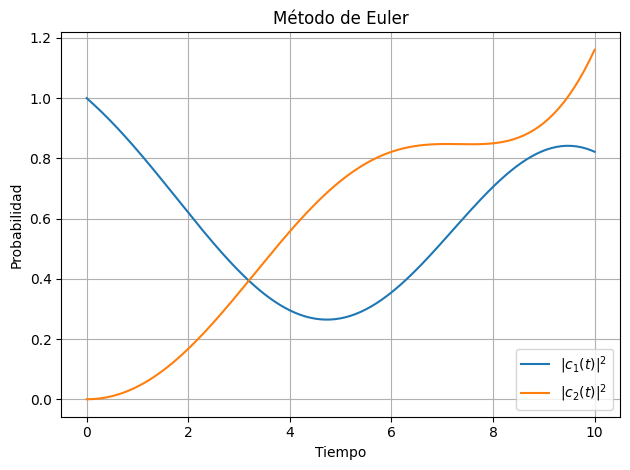

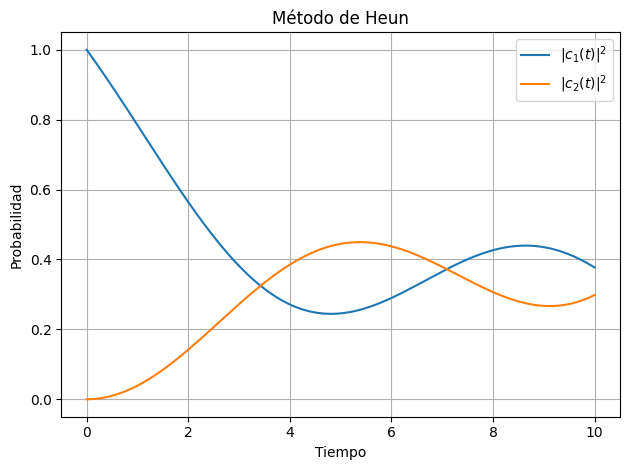

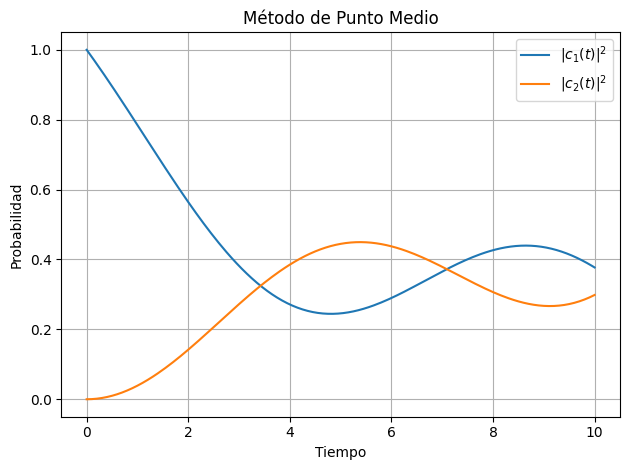

In [10]:
import numpy as np

# Parámetros físicos
omega1 = 1.0
omega2 = 1.5
Omega  = 0.2
gamma  = 0.1

# Hamiltoniano no hermítico
H = np.array([
    [omega1 - 1j * gamma, Omega],
    [Omega, omega2 + 1j * gamma]
])

# Estado inicial
psi0 = np.array([1.0, 0.0], dtype=complex)

# Parámetros de integración
dt = 0.05
tf = 10.0

# Resolver con distintos métodos
for nombre in ["Euler", "Heun", "Punto Medio"]:
    solver = NonHermitianSchrodinger(H, psi0, dt, tf)
    
    if nombre == "Euler":
        t, psi = solver.euler()
    elif nombre == "Heun":
        t, psi = solver.heun()
    elif nombre == "Punto Medio":
        t, psi = solver.puntomedio()

    solver.probabilidades(title=f"Método de {nombre}")
